<a href="https://colab.research.google.com/github/baddepudisaideepak/Kaggle_Assignment_Group_2/blob/main/Kaggle_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Spaceship Kaggle challenge code

This project addresses the Spaceship Titanic binary classification problem posed by Kaggle, where the objective is to predict whether a passenger was transported to another dimension following a hypothetical anomaly near a black hole. The dataset reflects passenger characteristics aboard the interstellar Titanic, combining numerical and categorical features across demographics, onboard expenditures, and accommodation details.

Our end-to-end pipeline incorporates a methodologically sound machine learning workflow, beginning with structured preprocessing and exploratory data analysis (EDA) to extract patterns and relationships within the data. Categorical variables are encoded using both label encoding and one-hot encoding to ensure robustness and model compatibility. Missing values are addressed through statistical imputation tailored to feature types.

We implemented and evaluated three classification models:



1.   Logistic Regression – as a baseline linear classifier.
2.   XGBoost – a powerful tree-based gradient boosting model.
3.   LightGBM – a fast, memory-efficient gradient boosting framework, selected for hyperparameter tuning based on its superior performance.






Each model was rigorously assessed using standard metrics, and further interpreted through Explainable AI (XAI) techniques using SHAP (SHapley Additive exPlanations), thereby promoting transparency and accountability in model decision-making.

The final LightGBM model was tuned using GridSearchCV, achieving optimal predictive performance and generalizability. Predictions were exported in the required submission format for Kaggle evaluation.

This work demonstrates a collaborative, reproducible, and interpretable data science approach, aligning with contemporary best practices in applied machine learning.



## Install & Import Libraries


In [50]:
# Install additional libraries
!pip install lightgbm xgboost shap

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
import lightgbm as lgb


## Load Data

In [51]:
# Load Kaggle Spaceship Titanic dataset
trainDF = pd.read_csv('https://raw.githubusercontent.com/Kaggle-project-group2/Kaggle_Assignment_Group_2/refs/heads/main/train.csv')
testDF = pd.read_csv('https://raw.githubusercontent.com/Kaggle-project-group2/Kaggle_Assignment_Group_2/refs/heads/main/test.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/Kaggle-project-group2/Kaggle_Assignment_Group_2/refs/heads/main/sample_submission.csv')

print("Train Shape:", trainDF.shape)
print("Test Shape:", testDF.shape)


Train Shape: (8693, 14)
Test Shape: (4277, 13)


In [52]:
# Display the first 5 rows
trainDF.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [53]:
 # Show summary information
 trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [54]:
# Display the first 5 rows
testDF.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [55]:
 # Show summary information
 testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## Exploratory Data Analysis - 1

<Axes: >

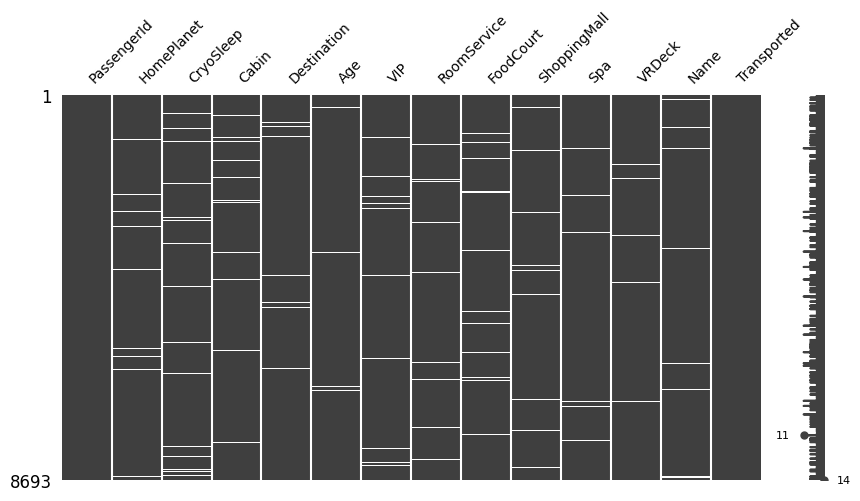

In [56]:
import missingno as msno

# Show missing values
msno.matrix(trainDF,figsize=(10,5),fontsize=10)

<Axes: >

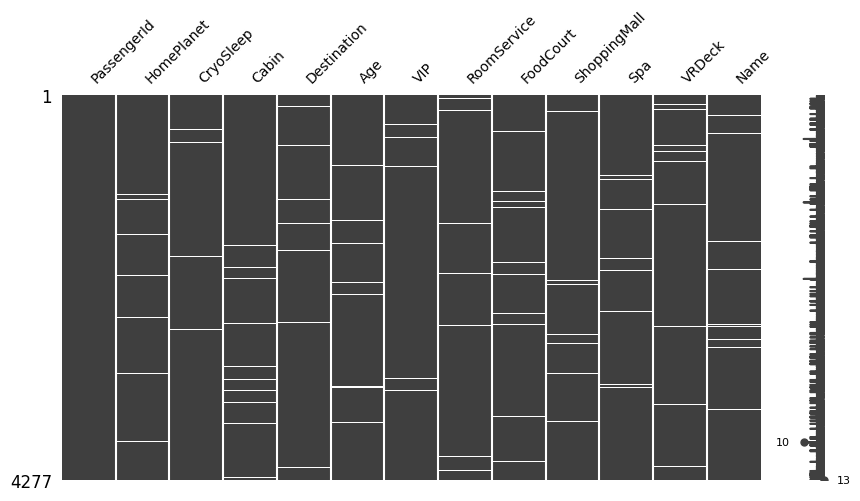

In [57]:
msno.matrix(testDF,figsize=(10,5),fontsize=10)

## Pre-Processing Function

In [58]:
def preprocess(df):
    """
    Preprocesses the Titanic dataset by performing the following operations:

    1. Splits the 'Cabin' column into three new columns: 'Deck', 'Cabin_num', and 'Side'.
    2. Converts 'Cabin_num' to a numeric type.
    3. Fills missing values for categorical columns with the mode.
    4. Fills missing values for numeric columns with the median.
    5. Drops the 'Name' and original 'Cabin' columns.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to be preprocessed.

    Returns:
    pandas.DataFrame: The cleaned and transformed DataFrame.
    """
    # Split Cabin into Deck, Num, Side
    df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)

    # Convert Cabin_num to numeric
    df['Cabin_num'] = pd.to_numeric(df['Cabin_num'], errors='coerce')

    # Handle missing categorical values (fill with mode)
    cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Handle missing numeric values (fill with median)
    num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())

    # Drop Name and Cabin
    df = df.drop(['Name', 'Cabin'], axis=1)

    return df

# Apply preprocessing
trainDF = preprocess(trainDF)
testDF = preprocess(testDF)


/tmp/ipython-input-2965085453.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
/tmp/ipython-input-2965085453.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [59]:
# Check missing values
print("Missing values after preprocessing:")
print(trainDF.isnull().sum())


Missing values after preprocessing:
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
dtype: int64


## Exploratory Data Analysis

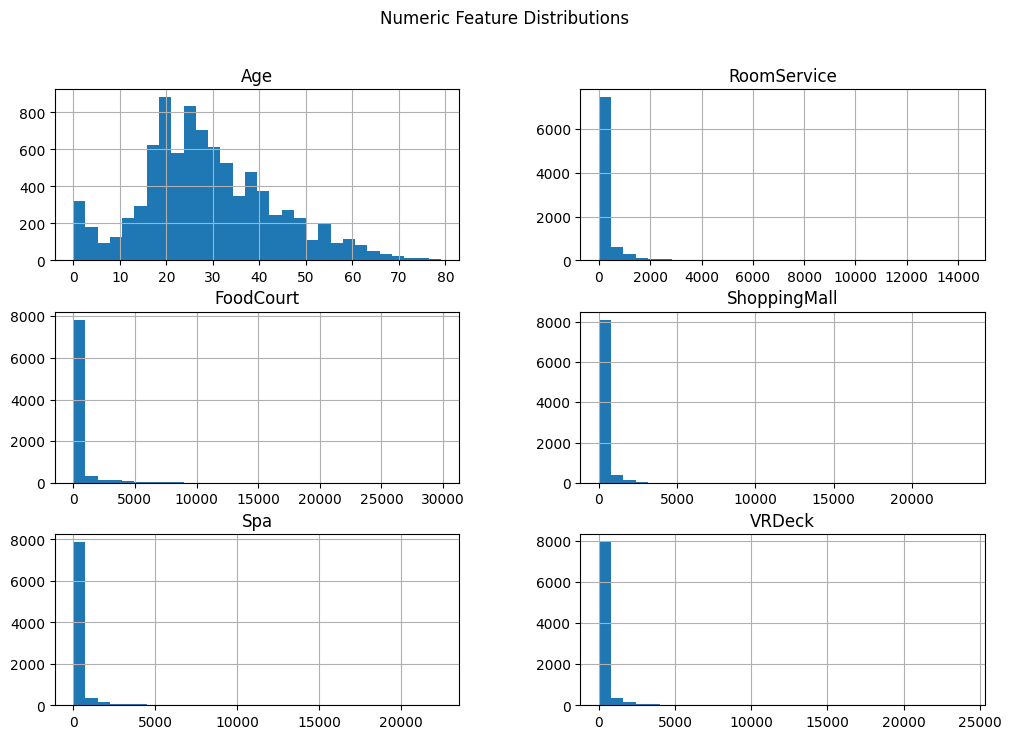

In [60]:
#  Distribution of numeric features
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
trainDF[num_cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Numeric Feature Distributions")
plt.show()

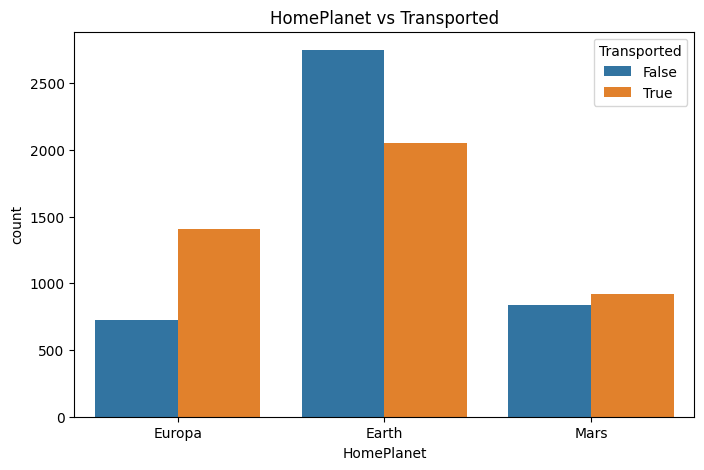

In [61]:
#  Bar chart for categorical variable vs Transported
plt.figure(figsize=(8,5))
sns.countplot(data=trainDF, x='HomePlanet', hue='Transported')
plt.title("HomePlanet vs Transported")
plt.show()

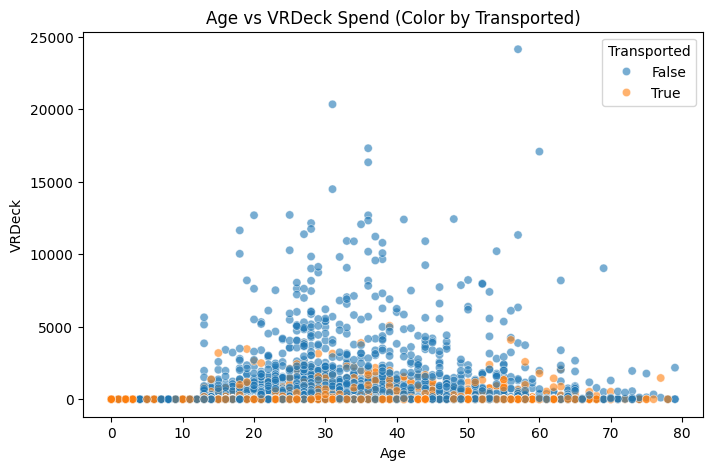

In [62]:
#  Scatter plot for numeric relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='VRDeck', hue='Transported', data=trainDF, alpha=0.6)
plt.title("Age vs VRDeck Spend (Color by Transported)")
plt.show()

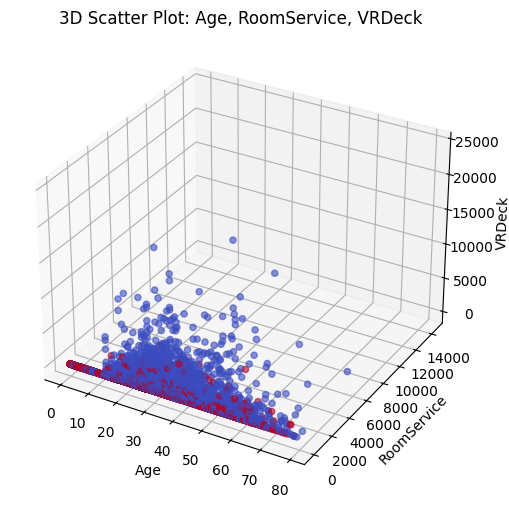

In [63]:
#  3D Scatter (Age, RoomService, VRDeck)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainDF['Age'], trainDF['RoomService'], trainDF['VRDeck'],
           c=trainDF['Transported'], cmap='coolwarm', alpha=0.6)
ax.set_xlabel('Age'); ax.set_ylabel('RoomService'); ax.set_zlabel('VRDeck')
plt.title("3D Scatter Plot: Age, RoomService, VRDeck")
plt.show()

## Encode Categorical Variables




This cell applies label encoding to categorical features shared by training and test datasets. It concatenates both datasets' feature columns to ensure consistent encoding, fits a `LabelEncoder` on the combined data, and then transforms each dataset separately. This prevents mismatched label mappings between train and test sets, which is crucial for maintaining model integrity during training and inference.


In [64]:
# List of categorical features to encode
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# Apply Label Encoding to each categorical feature
for col in cat_features:
    le = LabelEncoder()

    # Combine train and test columns to ensure consistent encoding across both datasets
    combined = pd.concat([trainDF[col], testDF[col]], axis=0)

    # Fit the label encoder on combined data
    le.fit(combined)

    # Transform and overwrite the original categorical column in both train and test sets
    trainDF[col] = le.transform(trainDF[col])
    testDF[col] = le.transform(testDF[col])


This cell prepares categorical data for machine learning by applying one-hot encoding to selected features, ensuring consistent feature spaces between training and test sets. It aligns encoded columns by adding missing features with zero values, preserving the dimensional integrity required for model compatibility across datasets. This step is essential to avoid mismatched input shapes during prediction or evaluation phases.












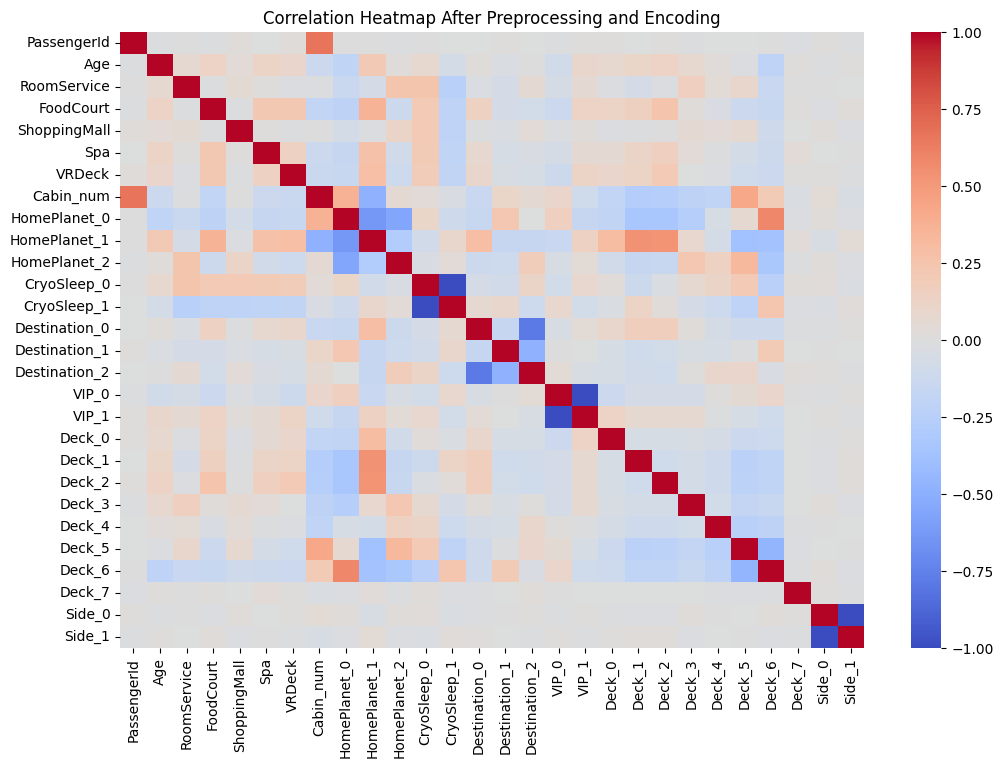

In [65]:
# Define categorical columns again
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# Define features and target
X = trainDF.drop('Transported', axis=1)
y = trainDF['Transported']
X_test = testDF.copy()


# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=cat_cols)
X_test = pd.get_dummies(X_test, columns=cat_cols)

# Align columns after one-hot encoding - crucial for consistent feature sets
train_cols = list(X.columns)
test_cols = list(X_test.columns)

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X[c] = 0

X_test = X_test[train_cols] # Ensure the order of columns is the same

# Now calculate and display the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap After Preprocessing and Encoding")
plt.show()

### Network analysis

In [66]:
#  Correlation Network Focused on 'Transported'
import networkx as nx
import matplotlib.pyplot as plt

# Ensure 'Transported' is numeric (0/1)
if 'Transported' in trainDF.columns:
    trainDF['Transported'] = trainDF['Transported'].astype(int)

# Compute correlation matrix including target
target_corr = trainDF.corr()['Transported'].drop('Transported')

# Sort by correlation strength
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

print("\n--- Correlation of Features with 'Transported' ---")
print(target_corr_sorted)



--- Correlation of Features with 'Transported' ---
CryoSleep       0.460132
RoomService     0.241124
Spa             0.218545
VRDeck          0.204874
HomePlanet      0.115461
Deck            0.114941
Destination     0.108152
Side            0.101397
Age             0.074233
FoodCourt       0.045583
Cabin_num       0.044502
VIP             0.037261
PassengerId     0.021491
ShoppingMall    0.009391
Name: Transported, dtype: float64


In [67]:
# Set threshold for significant correlation with target
threshold = 0.05  # Lower threshold since correlations may be small

In [68]:
# Build graph
G = nx.Graph()

# Add Transported as main node
G.add_node('Transported')

# Add nodes for features and edges if correlation >= threshold
for feature, corr_val in target_corr.items():
    if abs(corr_val) >= threshold:
        G.add_node(feature)
        G.add_edge('Transported', feature, weight=abs(corr_val))

# Print key info
print(f"\nFeatures connected to 'Transported' (|corr| >= {threshold}): {list(G.nodes)}")


Features connected to 'Transported' (|corr| >= 0.05): ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService', 'Spa', 'VRDeck', 'Deck', 'Side']


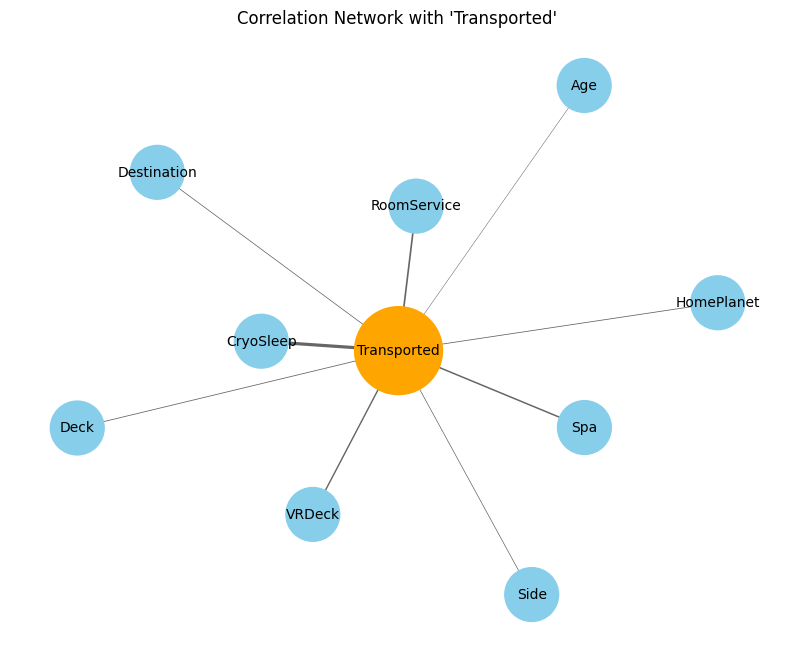

In [69]:
# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Node size and color
node_sizes = [4000 if node == 'Transported' else 1500 for node in G.nodes()]
node_colors = ['orange' if node == 'Transported' else 'skyblue' for node in G.nodes()]

# Edge width by correlation strength
edge_widths = [5 * G[u][v]['weight'] for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Correlation Network with 'Transported'")
plt.axis('off')
plt.show()

## Define Features and Target

This cell prepares data for supervised machine learning. It extracts the target variable y by converting the Transported column to integers, and defines X by removing Transported and PassengerId from trainDF. For the test set, it isolates PassengerId as test_ids and defines X_test by excluding it, ensuring consistency in features for model prediction.












In [70]:
# Convert the target column 'Transported' to integer (0/1) for binary classification
y = trainDF['Transported'].astype(int)

# Drop 'Transported' and 'PassengerId' to create feature matrix X for training
X = trainDF.drop(['Transported', 'PassengerId'], axis=1)

# Store PassengerId separately from test data (needed later for submission file)
test_ids = testDF['PassengerId']

# Drop 'PassengerId' from test data to prepare test feature matrix
X_test = testDF.drop(['PassengerId'], axis=1)


## Train-Test Split & Scaling

This cell splits the dataset into training and validation sets, then standardizes selected numerical features using z-score normalization via StandardScaler. Scaling is fit on the training set to avoid data leakage and applied consistently to validation and test sets. This preprocessing ensures features are on comparable scales, which is critical for gradient-based models like Logistic Regression.

In [71]:
# Split the training data into training and validation sets (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#  Scale numerical features using StandardScaler (important for models like Logistic Regression)

# Initialize the scaler
scaler = StandardScaler()

# Create copies of train, validation, and test sets for scaling
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# List of numeric columns to be scaled
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Fit scaler on training numeric columns and transform them
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform validation and test numeric columns using the same scaler
X_val_scaled[num_cols] = scaler.transform(X_val[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])



## Model Evaluation

This function uses SHAP (SHapley Additive exPlanations) to interpret tree-based model predictions. It generates a summary plot to visualize feature importance across the dataset and a dependence plot to examine how the feature "Age" influences the output. The SHAP TreeExplainer computes the contribution of each feature to the prediction, supporting model transparency and interpretability in complex machine learning systems.


In [72]:
def explain_with_shap(model, X_val, model_name="Model"):
    """
    Generates SHAP (SHapley Additive exPlanations) visualisations to interpret predictions
    of a trained tree-based machine learning model.

    Parameters:
    ----------
    model : object
        A trained tree-based model (e.g., XGBoost, LightGBM, or Decision Tree) compatible with SHAP.

    X_val : pandas.DataFrame
        Validation feature set used to compute SHAP values and generate visualisations.

    model_name : str, optional (default="Model")
        A label used in plot titles to indicate which model the explanations refer to.

    Visualisations:
    --------------
    1. SHAP Summary Plot: Shows the overall feature importance and the effect of features on model output.
    2. SHAP Dependence Plot (for 'Age'): Displays how SHAP values for 'Age' vary with its actual values.

    Returns:
    -------
    None
        Displays SHAP plots directly using matplotlib.
    """
    print(f"\nGenerating SHAP plots for {model_name}...")
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val)

    # Summary Plot
    shap.summary_plot(shap_values, X_val, show=False)
    plt.title(f"{model_name} - SHAP Summary")
    plt.show()

    # Dependence Plot (example for Age)
    shap.dependence_plot('Age', shap_values, X_val, show=False)
    plt.title(f"{model_name} - SHAP Dependence for Age")
    plt.show()


This function generates a Kaggle submission file by predicting outcomes on the test set using a trained model. If scaling is required (e.g., for linear models), it applies a `StandardScaler` to specified numeric features before prediction. Otherwise, it directly uses the model. This modular design supports both scaled and unscaled workflows, ensuring compatibility with different model requirements during deployment.


In [73]:
def create_submission(model, X_test, sample_submission, filename, is_scaled=False, scaler=None):
    """
    Generates a Kaggle-compatible submission CSV file using a trained model.

    Parameters:
    ----------
    model : sklearn-like estimator
        The trained classification model used to make predictions.

    X_test : pandas.DataFrame
        The test dataset on which predictions will be made.

    sample_submission : pandas.DataFrame
        A template submission DataFrame containing the 'PassengerId' column
        and an empty 'Transported' column to be filled with predictions.

    filename : str
        The name of the output CSV file to be saved.

    is_scaled : bool, optional (default=False)
        Whether the numerical features in X_test should be scaled
        using the provided scaler (typically True for models like Logistic Regression).

    scaler : sklearn.preprocessing object, optional
        A fitted scaler (e.g., StandardScaler) used to transform numerical features if is_scaled is True.

    Returns:
    -------
    None
        Saves the predictions to a CSV file in the specified filename.
    """
    if is_scaled and scaler is not None:
        # Apply scaling to numeric columns for models like Logistic Regression
        num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
        X_test_scaled = X_test.copy()
        X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)

    # Convert predictions to boolean as required by the competition
    sample_submission['Transported'] = preds.astype(bool)
    sample_submission.to_csv(filename, index=False)
    print(f"Submission file saved as: {filename}")


### Logistic Regression

In [74]:
# Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)
print("Logistic Regression Accuracy:", accuracy_score(y_val, lr.predict(X_val_scaled)))

Logistic Regression Accuracy: 0.7705577918343876


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'solver': ['liblinear', 'saga'],  # solvers that support both l1 and l2
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]  # Regularization strength (lower = more regularization)
}

# Initialize logistic regression (max_iter high enough to ensure convergence)
lr = LogisticRegression(max_iter=500)

# Set up GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on validation set
best_model = grid_search.best_estimator_
val_preds = best_model.predict(X_val_scaled)
print("Validation Accuracy with Tuned Model:", accuracy_score(y_val, val_preds))


Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7899062317363936
Validation Accuracy with Tuned Model: 0.772857964347326


In [76]:
create_submission(best_model, X_test_scaled, sample_submission.copy(), 'submission_lr.csv', is_scaled=True, scaler=scaler)

Submission file saved as: submission_lr.csv


### XGBoost

In [77]:
# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Accuracy:", accuracy_score(y_val, xgb_model.predict(X_val)))

XGBoost Accuracy: 0.7998849913743531



Generating SHAP plots for XGBoost...


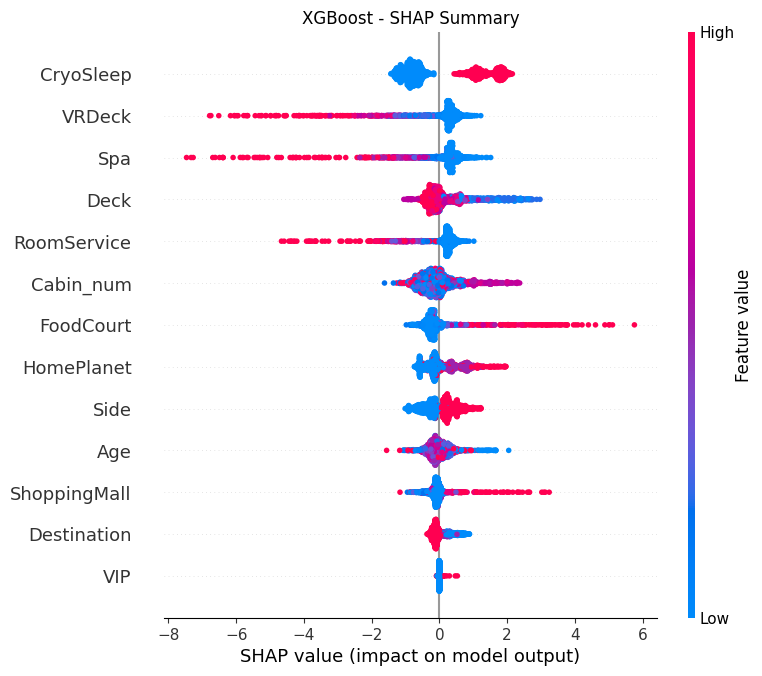

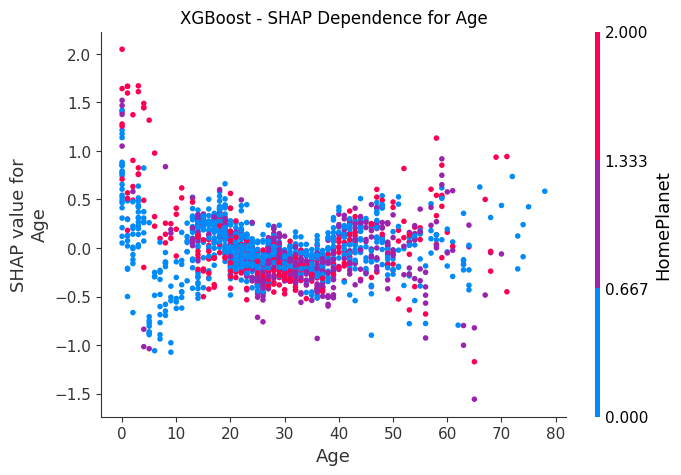

Submission file saved as: submission_xgb.csv


In [78]:
# For XGBoost
explain_with_shap(xgb_model, X_val, model_name="XGBoost")
create_submission(xgb_model, X_test, sample_submission.copy(), 'submission_xgb.csv')


### LightGBM

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import shap

In [80]:
# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
print("LightGBM Accuracy:", accuracy_score(y_val, lgb_model.predict(X_val)))

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1628
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
LightGBM Accuracy: 0.8039102932719954


### lightGBM Analysis & XAI

In [81]:
#  Evaluate LightGBM model on the validation set

# Predict class labels (0 or 1) for the validation set
val_preds = lgb_model.predict(X_val)

# Predict class probabilities and extract probability of the positive class (class 1)
val_proba = lgb_model.predict_proba(X_val)[:, 1]

# Compute Accuracy: proportion of correct predictions
acc = accuracy_score(y_val, val_preds)

# Compute Precision: proportion of predicted positives that are actual positives
prec = precision_score(y_val, val_preds)

# Compute Recall: proportion of actual positives that were correctly identified
rec = recall_score(y_val, val_preds)

# Compute F1 Score: harmonic mean of precision and recall (balances both metrics)
f1 = f1_score(y_val, val_preds)

# Compute ROC-AUC: area under the ROC curve (how well the model distinguishes classes)
roc_auc = roc_auc_score(y_val, val_proba)

# Print all evaluation metrics, formatted to 4 decimal places
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")


Accuracy:  0.8039
Precision: 0.8000
Recall:    0.8155
F1-score:  0.8077
ROC-AUC:   0.8962


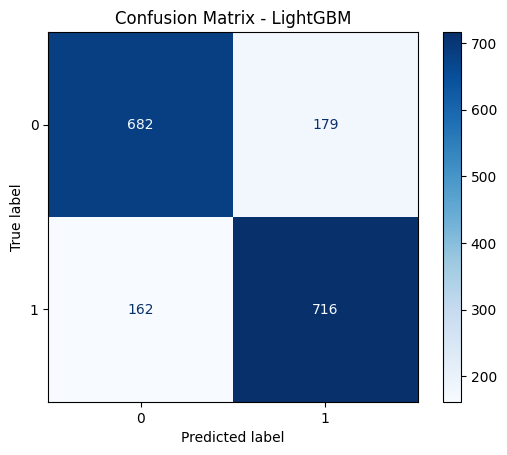

In [82]:
# Confusion Matrix
cm = confusion_matrix(y_val, val_preds)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix - LightGBM")
plt.show()

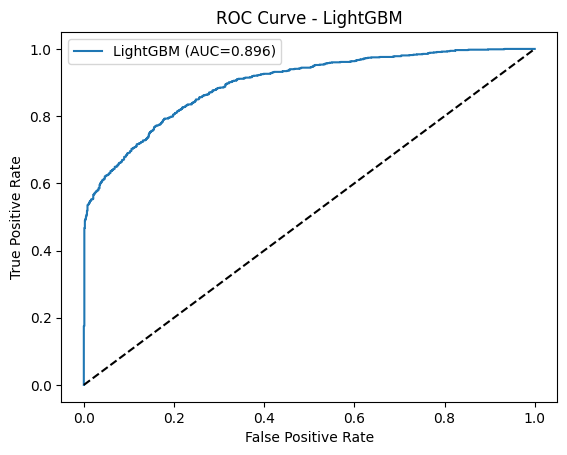

In [83]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, val_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'LightGBM (AUC={roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

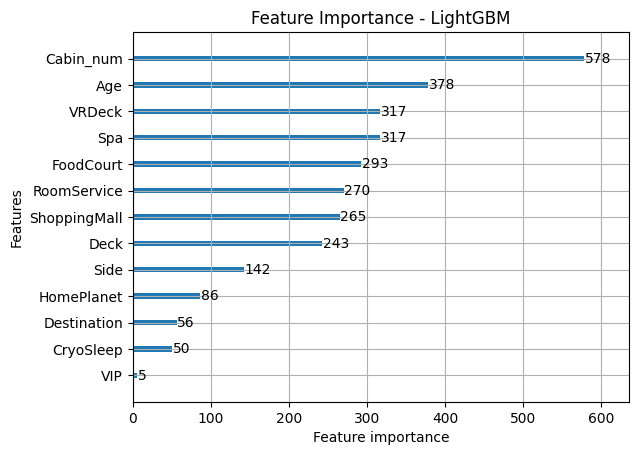

In [84]:
# Feature Importance
plt.figure(figsize=(10,6))
lgb.plot_importance(lgb_model, max_num_features=15)
plt.title("Feature Importance - LightGBM")
plt.show()

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


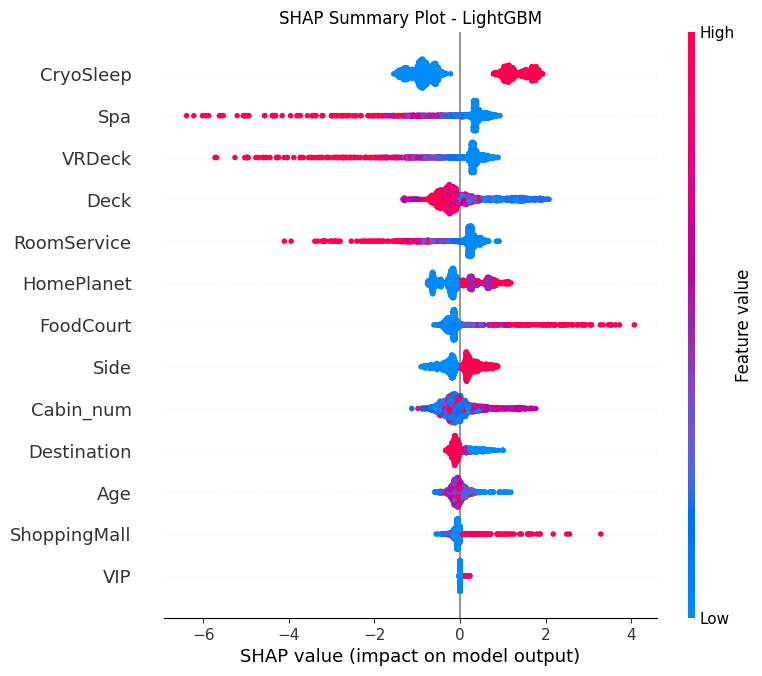

In [85]:
# SHAP explainability
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_val)

# SHAP summary plot
shap.summary_plot(shap_values, X_val, show=False)
plt.title("SHAP Summary Plot - LightGBM")
plt.show()

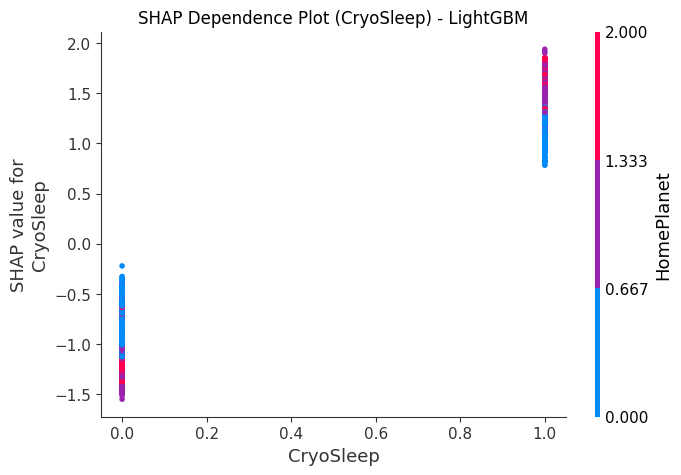

In [86]:
# SHAP dependence plot for top feature
top_feature = X_val.columns[np.abs(shap_values).mean(axis=0).argmax()]
shap.dependence_plot(top_feature, shap_values, X_val, show=False)
plt.title(f"SHAP Dependence Plot ({top_feature}) - LightGBM")
plt.show()

In [87]:
# Create submission
create_submission(lgb_model, X_test, sample_submission.copy(), 'submission_lgb.csv')

Submission file saved as: submission_lgb.csv


### Tuned LightGBM

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import shap

In [89]:
#  Minimal, safe parameter grid for LightGBM
param_grid = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500]
}

#  Initialize LightGBM model
lgb_base = lgb.LGBMClassifier(random_state=42)

#  Grid Search (safe & not excessive)
lgb_grid = GridSearchCV(
    estimator=lgb_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)
lgb_grid.fit(X_train, y_train)

#  Best model
best_lgb = lgb_grid.best_estimator_
print("Best LightGBM Parameters:", lgb_grid.best_params_)

#  Evaluate on validation set
val_preds = best_lgb.predict(X_val)
val_proba = best_lgb.predict_proba(X_val)[:, 1]

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1628
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
Best LightGBM Parameters: {'learning_rate': 0.01, 'n_estimators': 300, 'num_leaves': 50}


### Tunned LightGBM Analysis & XAI

In [90]:
# Evaluate the model's performance on validation data

# Accuracy: overall correctness of the model
acc = accuracy_score(y_val, val_preds)

# Precision: true positives / (true positives + false positives)

prec = precision_score(y_val, val_preds)

# Recall: true positives / (true positives + false negatives)

rec = recall_score(y_val, val_preds)

# F1 Score: harmonic mean of precision and recall

f1 = f1_score(y_val, val_preds)

# ROC-AUC Score: measures the area under the ROC curve
roc_auc = roc_auc_score(y_val, val_proba)

# Display the evaluation metrics
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")


Accuracy:  0.8056
Precision: 0.7909
Recall:    0.8360
F1-score:  0.8128
ROC-AUC:   0.8949


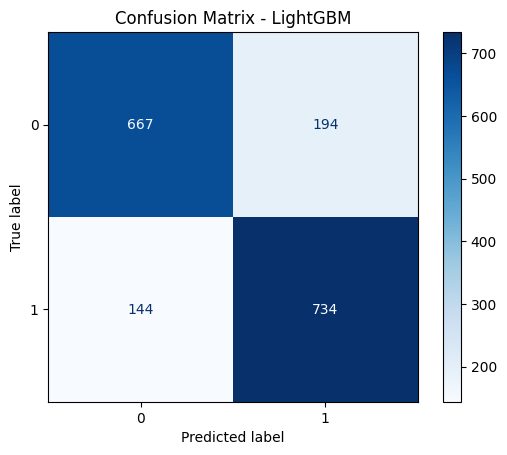

In [91]:
#  Confusion Matrix
cm = confusion_matrix(y_val, val_preds)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix - LightGBM")
plt.show()

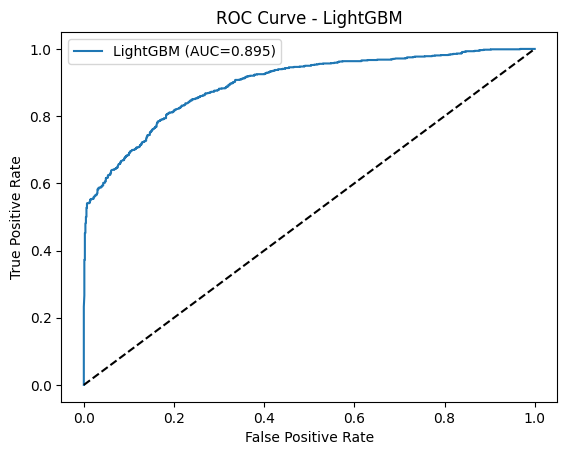

In [92]:
#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, val_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'LightGBM (AUC={roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

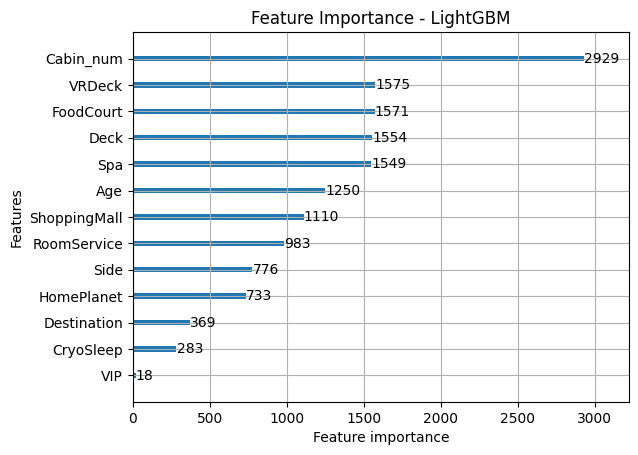

In [93]:
#  Feature Importance
plt.figure(figsize=(10,6))
lgb.plot_importance(best_lgb, max_num_features=15)
plt.title("Feature Importance - LightGBM")
plt.show()

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


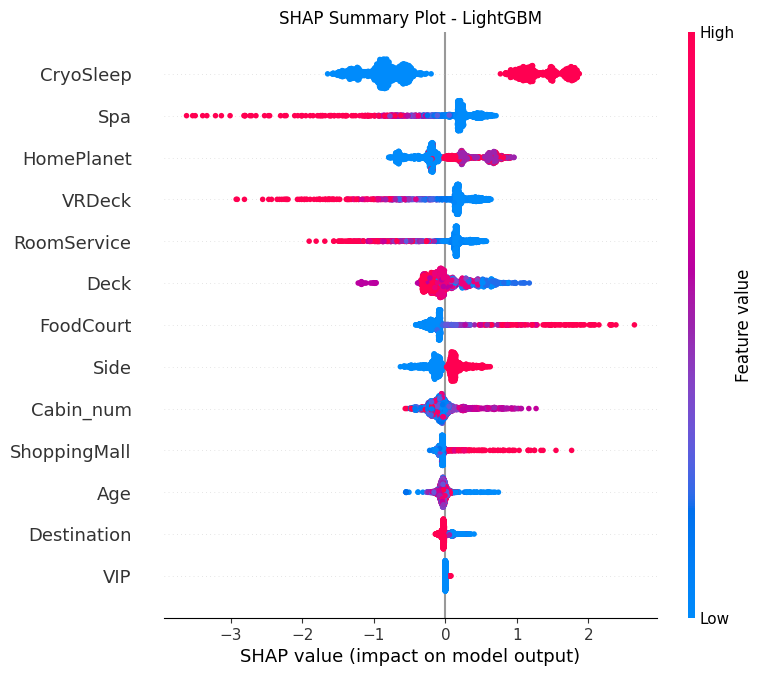

In [94]:
# SHAP Values (XAI)
explainer = shap.TreeExplainer(best_lgb)
shap_values = explainer.shap_values(X_val)

# SHAP summary plot
shap.summary_plot(shap_values, X_val, show=False)
plt.title("SHAP Summary Plot - LightGBM")
plt.show()

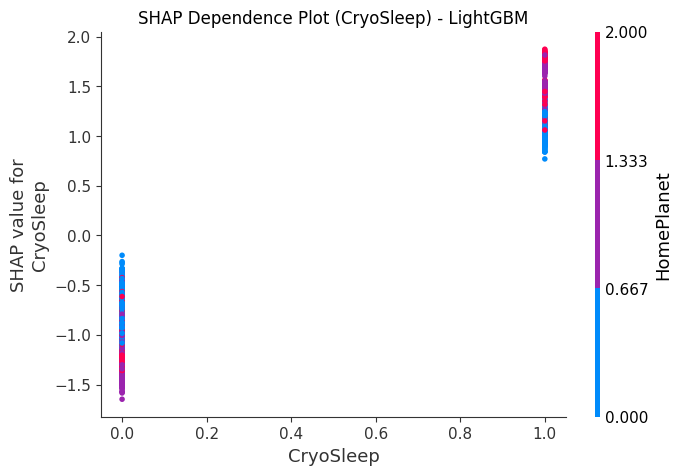

In [95]:
# SHAP dependence plot (for top feature)
top_feature = X_val.columns[np.abs(shap_values).mean(axis=0).argmax()]
shap.dependence_plot(top_feature, shap_values, X_val, show=False)
plt.title(f"SHAP Dependence Plot ({top_feature}) - LightGBM")
plt.show()

In [96]:
#  Submission for Kaggle
create_submission(best_lgb, X_test, sample_submission.copy(), 'submission_lgb_tuned.csv')

Submission file saved as: submission_lgb_tuned.csv
